#Install necessary packages

In [48]:
!pip install -U pycaret[full]
!pip install -U mlflow

#Connect Google Drive so we can load the dataset directly from there.

In [49]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


#Load the heart disease dataset from Google Drive using pandas.

In [50]:
import pandas as pd
dataset_path = '/content/drive/MyDrive/DataSET/heart_disease_uci.csv'
df = pd.read_csv(dataset_path)


 # Preprocessing

In [51]:
# Drop unnecessary columns
df.drop(columns=['id', 'dataset'], inplace=True, errors='ignore')



In [52]:
# Rename target column
df.rename(columns={'num': 'target'}, inplace=True)

In [53]:
# Map binary categorical features
df['sex'] = df['sex'].map({'Male': 1, 'Female': 0})
df['fbs'] = df['fbs'].map({'Yes': 1, 'No': 0})
df['exang'] = df['exang'].map({'Yes': 1, 'No': 0})



In [54]:
# One-hot encode categorical features
df = pd.get_dummies(df, columns=['cp', 'restecg', 'slope', 'thal'], drop_first=True)


In [55]:
# Convert boolean to integers (if any)
bool_columns = df.select_dtypes(include='bool').columns
df[bool_columns] = df[bool_columns].astype(int)

# After Preprocessing Graphs for Assessment

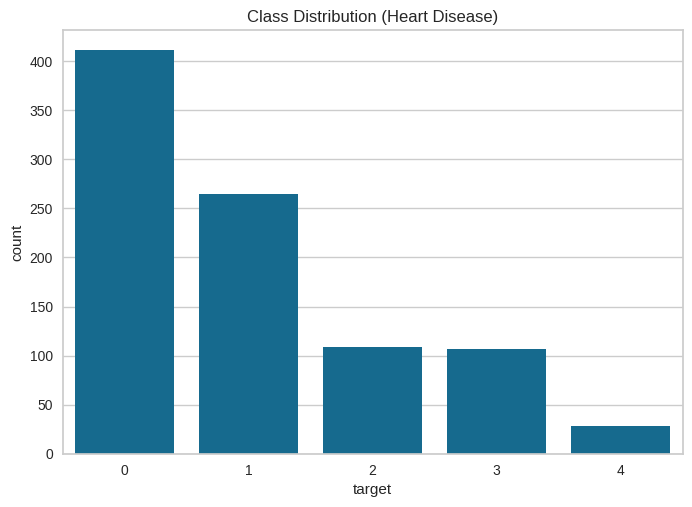

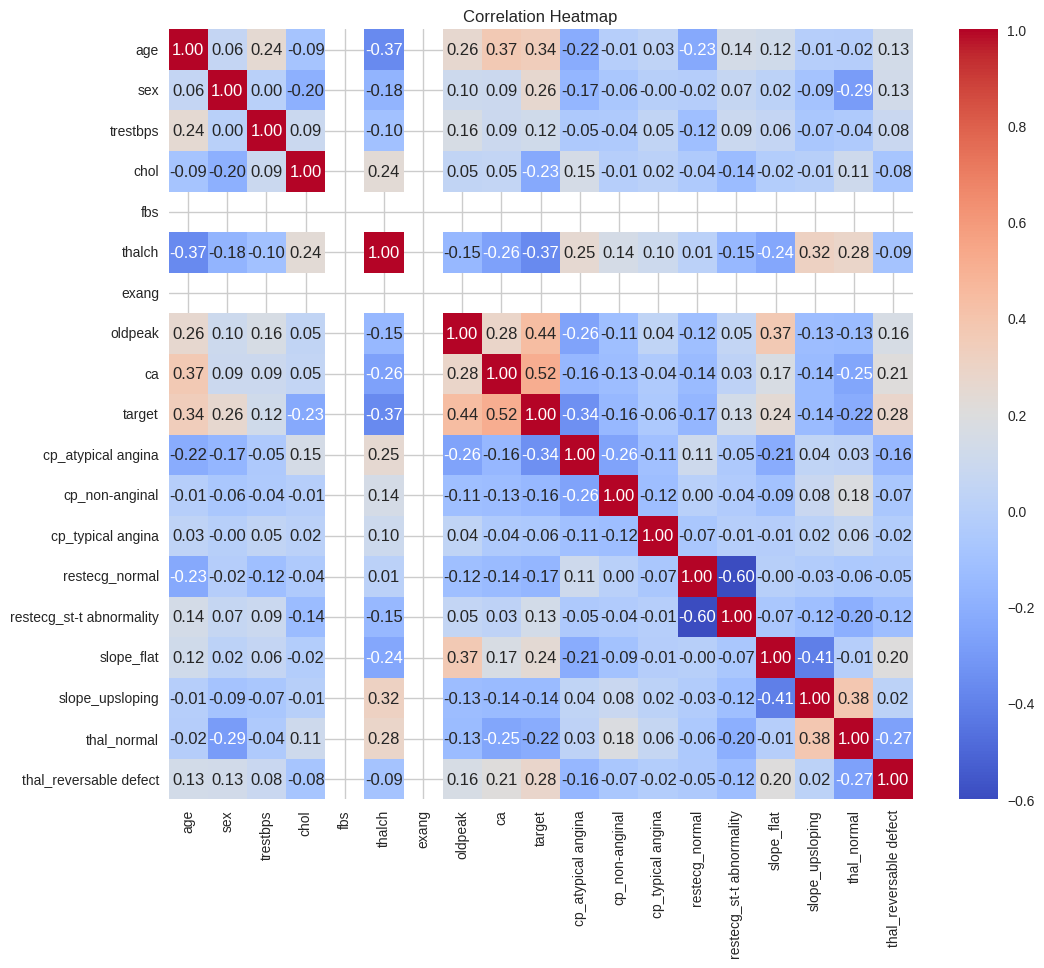

In [56]:
import seaborn as sns
import matplotlib.pyplot as plt

# Check target class balance
sns.countplot(x='target', data=df)
plt.title('Class Distribution (Heart Disease)')
plt.show()

# Correlation heatmap
plt.figure(figsize=(12,10))
sns.heatmap(df.corr(), annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()


# Set up the PyCaret environment to define our data, target, and experiment settings.

In [57]:
from pycaret.classification import *

In [59]:
env = setup(
    data=df,
    target='target',
    session_id=42,
    normalize=True,
    remove_multicollinearity=True,
    log_experiment=False,
    experiment_name='heart_disease'
)

,Description,Value
0,Session id,42
1,Target,target
2,Target type,Multiclass
3,Original data shape,"(920, 19)"
4,Transformed data shape,"(920, 17)"
5,Transformed train set shape,"(644, 17)"
6,Transformed test set shape,"(276, 17)"
7,Numeric features,18
8,Rows with missing values,100.0%
9,Preprocess,True


# Model Training and Tuning

Compare different models to find the best one and then fine-tune it.

In [60]:
best_model = compare_models()
tuned_model = tune_model(best_model)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
rf,Random Forest Classifier,0.5714,0.8029,0.5714,0.5344,0.5444,0.3472,0.3518,0.2860
catboost,CatBoost Classifier,0.5667,0.8024,0.5667,0.5405,0.5479,0.3504,0.3541,6.4100
gbc,Gradient Boosting Classifier,0.5652,0.0000,0.5652,0.5389,0.5474,0.3509,0.3539,0.8620
ridge,Ridge Classifier,0.5605,0.0000,0.5605,0.4876,0.5119,0.3131,0.3234,0.0530
lightgbm,Light Gradient Boosting Machine,0.5559,0.7889,0.5559,0.5353,0.5403,0.3368,0.3395,0.8490
xgboost,Extreme Gradient Boosting,0.5543,0.7956,0.5543,0.5434,0.5428,0.3367,0.3396,0.3530
lda,Linear Discriminant Analysis,0.5542,0.0000,0.5542,0.5339,0.5390,0.3380,0.3407,0.0420
lr,Logistic Regression,0.5496,0.0000,0.5496,0.5245,0.5279,0.3225,0.3263,0.9790
et,Extra Trees Classifier,0.5482,0.7901,0.5482,0.5145,0.5249,0.3226,0.3270,0.2670
knn,K Neighbors Classifier,0.5325,0.7469,0.5325,0.4897,0.4987,0.2823,0.2875,0.0940


Processing:   0%|          | 0/69 [00:00<?, ?it/s]

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.5846,0.8643,0.5846,0.4914,0.5313,0.3500,0.3616
1,0.5692,0.7529,0.5692,0.5259,0.5225,0.3194,0.3341
2,0.5846,0.8606,0.5846,0.5561,0.5399,0.3395,0.3528
3,0.5538,0.8338,0.5538,0.5042,0.5205,0.3170,0.3223
4,0.5312,0.8315,0.5312,0.4552,0.4893,0.2760,0.2807
5,0.5312,0.7691,0.5312,0.4639,0.4860,0.2644,0.2743
6,0.5781,0.8040,0.5781,0.4808,0.5172,0.3295,0.3426
7,0.5938,0.8249,0.5938,0.4974,0.5361,0.3651,0.3763
8,0.5312,0.7890,0.5312,0.4358,0.4707,0.2547,0.2674


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 10 candidates, totalling 100 fits


Original model was better than the tuned model, hence it will be returned. NOTE: The display metrics are for the tuned model (not the original one).


# Evaluate model
We check how well the model works using plots:


interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

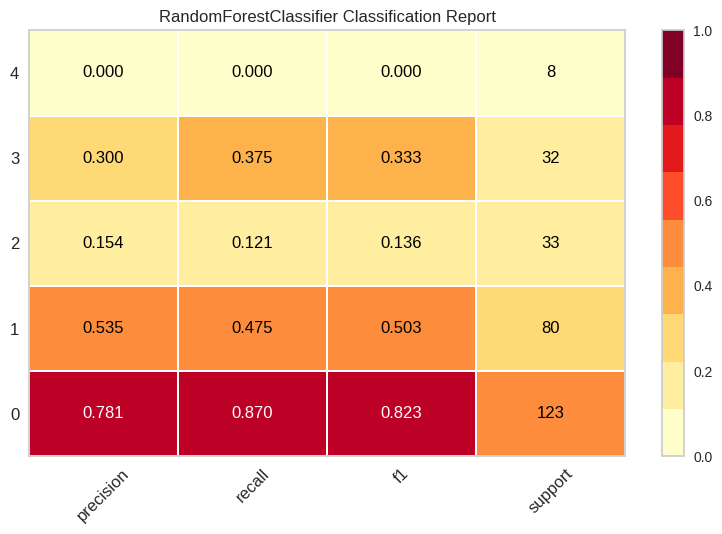

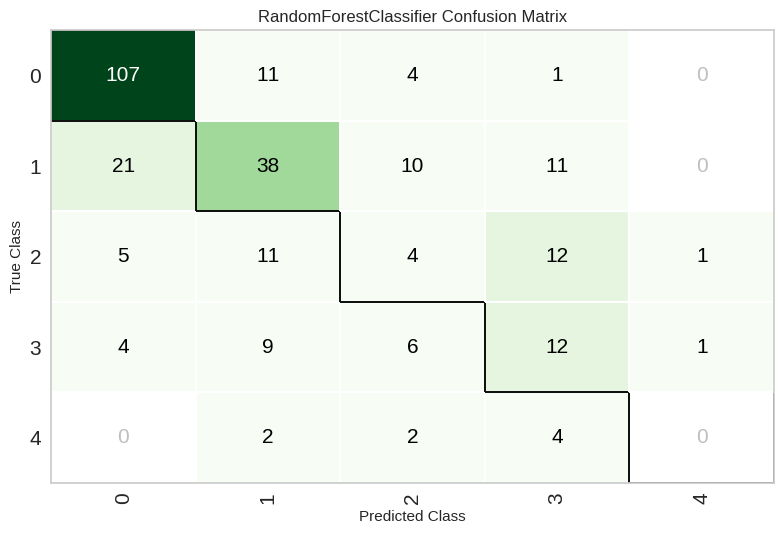

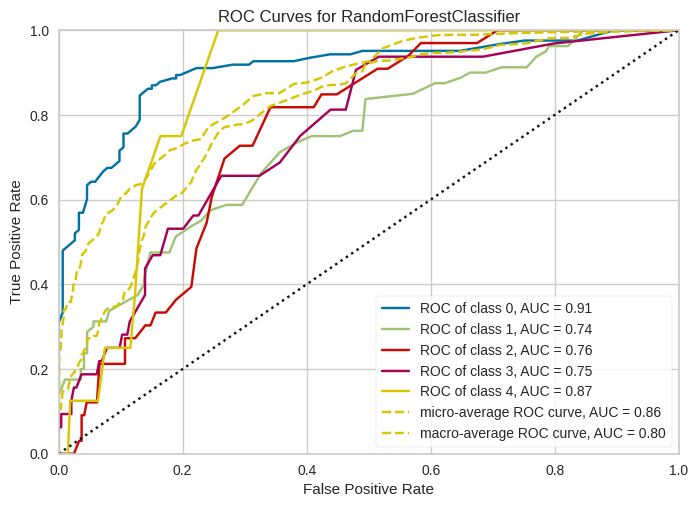

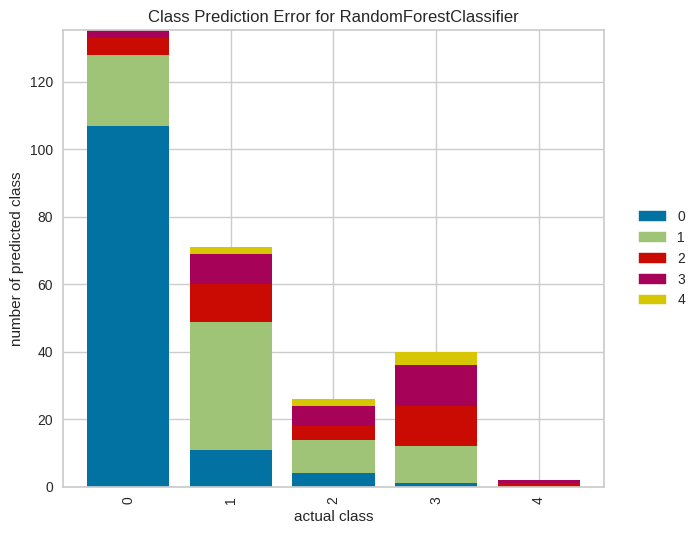

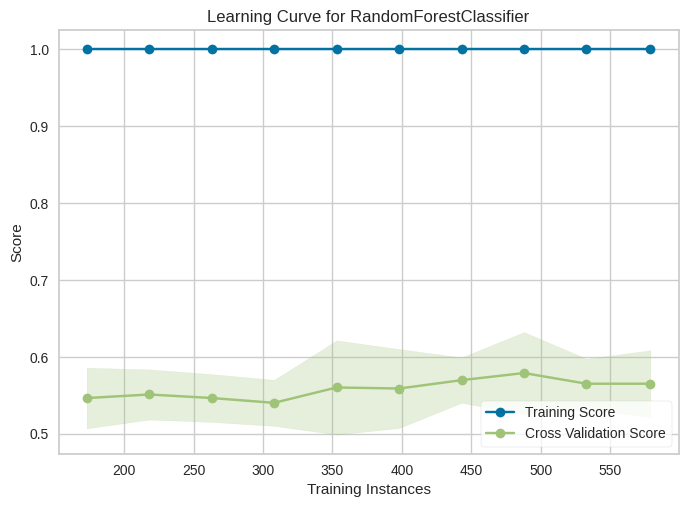

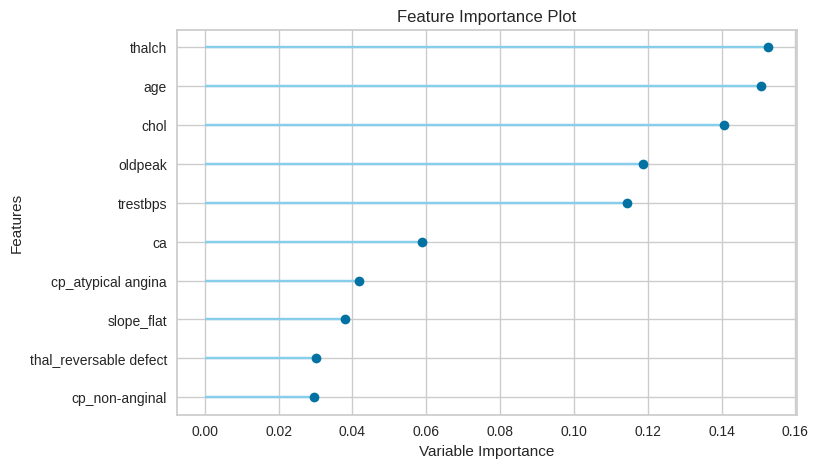

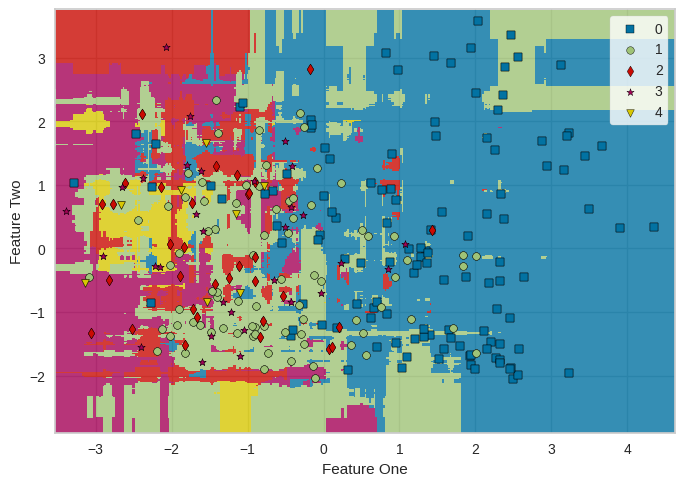

In [61]:
#Evaluate model
evaluate_model(tuned_model)

# Overall performance summary
plot_model(tuned_model, plot='class_report')

# Detailed performance visualizations
plot_model(tuned_model, plot='confusion_matrix')
plot_model(tuned_model, plot='auc')
plot_model(tuned_model, plot='error')

# Learning insights
plot_model(tuned_model, plot='learning')

# Model explainability
plot_model(tuned_model, plot='feature')

# Decision surface (if applicable)
plot_model(tuned_model, plot='boundary')


# Test CatBoost, Gradient Boosting, XGBoost models separately


,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.6615,0.8480,0.6615,0.6480,0.6514,0.4925,0.4948
1,0.5231,0.7346,0.5231,0.4865,0.4841,0.2565,0.2679
2,0.5538,0.8551,0.5538,0.5283,0.5369,0.3358,0.3386
3,0.6000,0.8298,0.6000,0.5445,0.5651,0.3986,0.4038
4,0.5938,0.8253,0.5938,0.6195,0.6034,0.4188,0.4209
5,0.5312,0.7563,0.5312,0.5399,0.5303,0.3076,0.3112
6,0.5469,0.7966,0.5469,0.4874,0.5109,0.3004,0.3048
7,0.6406,0.8142,0.6406,0.5941,0.6154,0.4584,0.4606
8,0.5000,0.7680,0.5000,0.4661,0.4809,0.2555,0.2569


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.6000,0.8658,0.6000,0.5073,0.5493,0.3796,0.3897
1,0.5231,0.7406,0.5231,0.4738,0.4893,0.2603,0.2655
2,0.6000,0.8431,0.6000,0.5624,0.5772,0.3940,0.3978
3,0.5692,0.8345,0.5692,0.5150,0.5383,0.3505,0.3536
4,0.5625,0.8036,0.5625,0.5564,0.5565,0.3605,0.3625
5,0.5000,0.7654,0.5000,0.4449,0.4523,0.2093,0.2170
6,0.5469,0.7949,0.5469,0.4517,0.4947,0.2943,0.3010
7,0.5781,0.8133,0.5781,0.5079,0.5387,0.3504,0.3567
8,0.5469,0.7951,0.5469,0.4562,0.4908,0.2889,0.3002


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 10 candidates, totalling 100 fits


Original model was better than the tuned model, hence it will be returned. NOTE: The display metrics are for the tuned model (not the original one).


interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

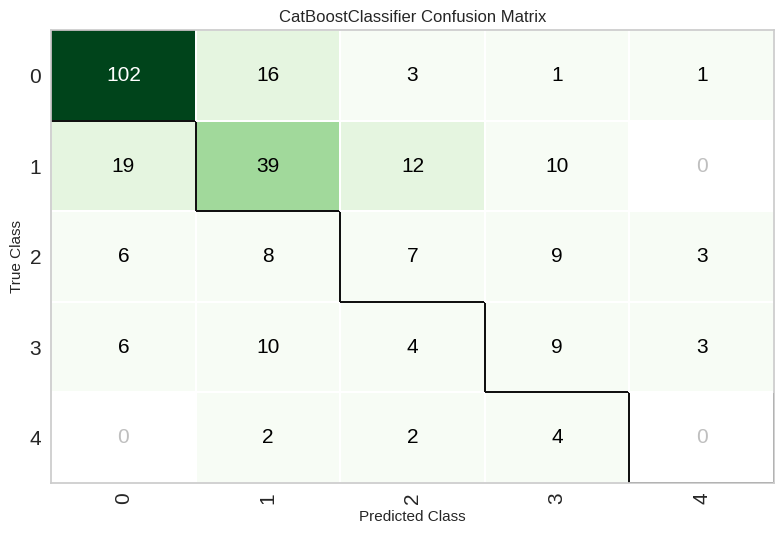

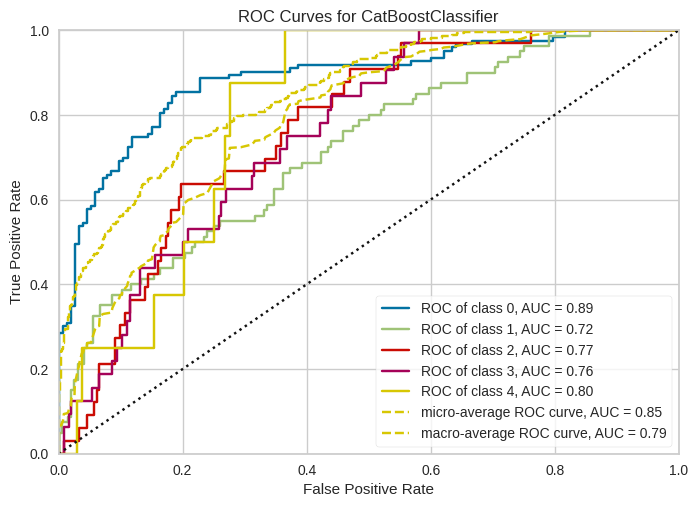

In [62]:
catboost_model = create_model('catboost')
tuned_catboost = tune_model(catboost_model)
evaluate_model(tuned_catboost)
plot_model(tuned_catboost, plot='confusion_matrix')
plot_model(tuned_catboost, plot='auc')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.5692,0.0000,0.5692,0.5693,0.5673,0.3661,0.3670
1,0.5077,0.0000,0.5077,0.5010,0.5025,0.2780,0.2790
2,0.6308,0.0000,0.6308,0.6024,0.6145,0.4468,0.4485
3,0.5692,0.0000,0.5692,0.5243,0.5411,0.3592,0.3637
4,0.5625,0.0000,0.5625,0.5429,0.5491,0.3540,0.3567
5,0.5156,0.0000,0.5156,0.5028,0.5003,0.2735,0.2793
6,0.5469,0.0000,0.5469,0.4859,0.5140,0.3121,0.3152
7,0.6406,0.0000,0.6406,0.6124,0.6216,0.4564,0.4594
8,0.4375,0.0000,0.4375,0.3988,0.4141,0.1570,0.1587


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.6615,0.0000,0.6615,0.6611,0.6492,0.4893,0.4931
1,0.4769,0.0000,0.4769,0.4349,0.4404,0.1899,0.1968
2,0.6308,0.0000,0.6308,0.6262,0.6173,0.4519,0.4557
3,0.5846,0.0000,0.5846,0.5360,0.5550,0.3687,0.3731
4,0.5781,0.0000,0.5781,0.5841,0.5800,0.3885,0.3896
5,0.4844,0.0000,0.4844,0.4810,0.4694,0.2172,0.2234
6,0.6094,0.0000,0.6094,0.5221,0.5609,0.3949,0.4022
7,0.6406,0.0000,0.6406,0.6061,0.6163,0.4562,0.4607
8,0.5156,0.0000,0.5156,0.4862,0.4969,0.2703,0.2723


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 10 candidates, totalling 100 fits


interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

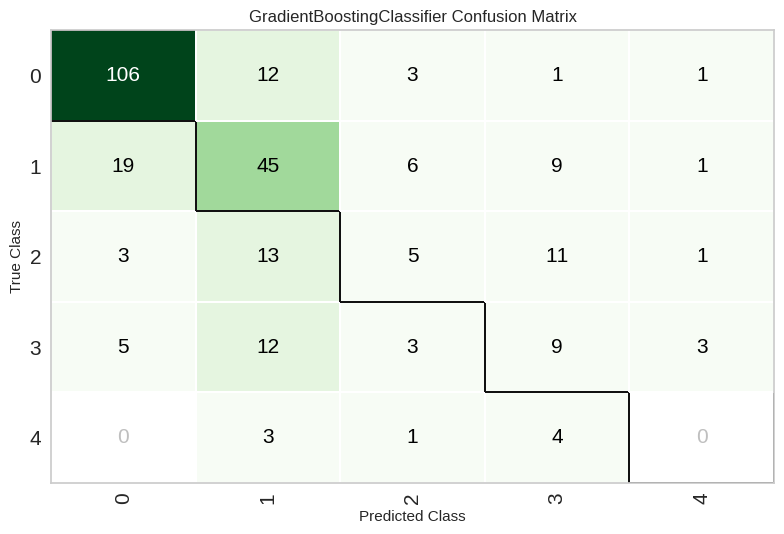

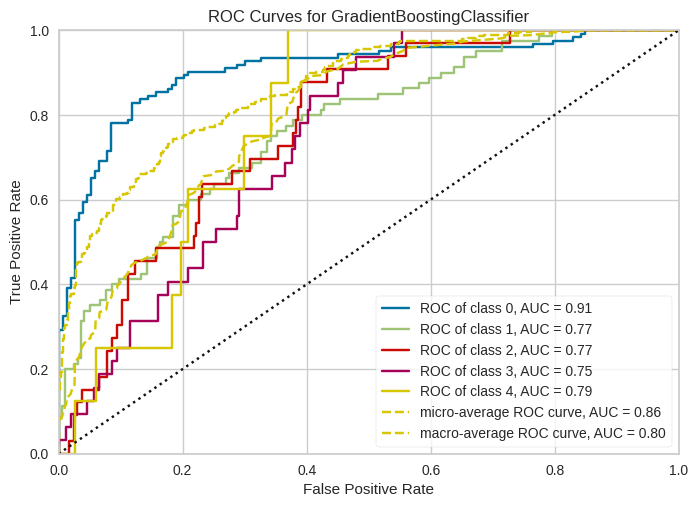

In [63]:
Gradient_Boosting_model = create_model('gbc')
tuned_Gradient_Boosting = tune_model(Gradient_Boosting_model)
evaluate_model(tuned_Gradient_Boosting)
plot_model(tuned_Gradient_Boosting, plot='confusion_matrix')
plot_model(tuned_Gradient_Boosting, plot='auc')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.5846,0.8249,0.5846,0.5780,0.5796,0.3874,0.3884
1,0.4462,0.7021,0.4462,0.4276,0.4266,0.1699,0.1739
2,0.6154,0.8574,0.6154,0.6002,0.6060,0.4318,0.4331
3,0.5846,0.8282,0.5846,0.5750,0.5781,0.3994,0.4005
4,0.5781,0.8244,0.5781,0.6093,0.5905,0.4006,0.4027
5,0.5000,0.7532,0.5000,0.5554,0.5083,0.2545,0.2609
6,0.5156,0.7910,0.5156,0.4617,0.4819,0.2555,0.2596
7,0.6250,0.7910,0.6250,0.5868,0.6023,0.4301,0.4333
8,0.5000,0.7544,0.5000,0.4663,0.4765,0.2398,0.2428


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.6154,0.8736,0.6154,0.5891,0.5827,0.4052,0.4137
1,0.5077,0.7446,0.5077,0.4383,0.4563,0.2163,0.2263
2,0.6462,0.8490,0.6462,0.6077,0.6074,0.4469,0.4588
3,0.5846,0.8413,0.5846,0.5437,0.5587,0.3710,0.3750
4,0.5625,0.8354,0.5625,0.4914,0.5239,0.3321,0.3374
5,0.5000,0.7922,0.5000,0.4342,0.4455,0.1991,0.2095
6,0.5938,0.8191,0.5938,0.4652,0.5198,0.3490,0.3650
7,0.6094,0.8311,0.6094,0.5187,0.5585,0.3916,0.4005
8,0.5312,0.7693,0.5312,0.4373,0.4751,0.2638,0.2736


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 10 candidates, totalling 100 fits


interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

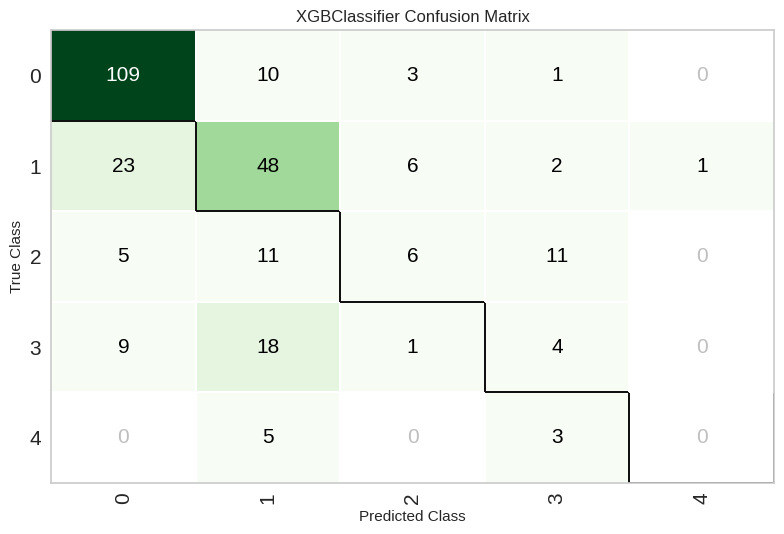

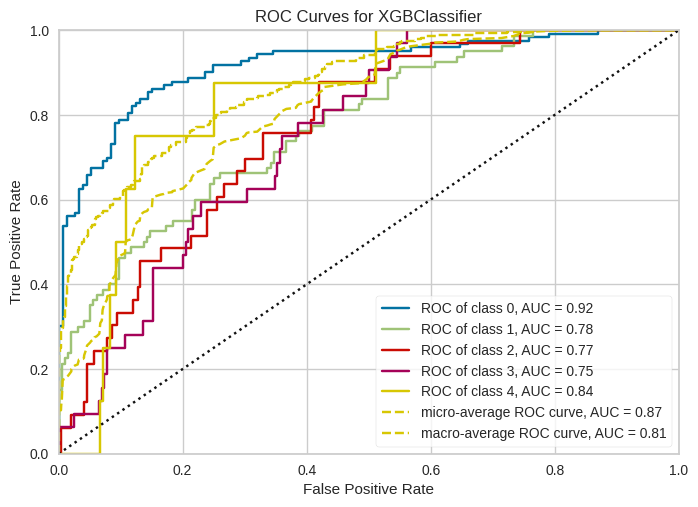

In [64]:
Extreme_Gradient_Boosting_model = create_model('xgboost')
tuned_Extreme_Gradient_Boosting = tune_model(Extreme_Gradient_Boosting_model)
evaluate_model(tuned_Extreme_Gradient_Boosting)
plot_model(tuned_Extreme_Gradient_Boosting, plot='confusion_matrix')
plot_model(tuned_Extreme_Gradient_Boosting, plot='auc')

# Make predictions
We use the tuned model to make predictions on the dataset.

In [65]:
predictions = predict_model(tuned_model)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Random Forest Classifier,0.5833,0.8207,0.5833,0.5564,0.5676,0.3836,0.3853


#Show predictions
Display the predicted labels and prediction scores for the first 10 rows.

python
Copy
Edit


In [66]:
# STEP 9: Show predictions
print(predictions[['target', 'prediction_label']].head(10))
print(predictions[['prediction_score']].head(10))

     target  prediction_label
525       1                 1
778       0                 0
680       3                 3
504       1                 0
482       0                 0
478       0                 0
101       0                 0
365       0                 0
471       0                 0
842       1                 1
     prediction_score
525              0.52
778              0.52
680              0.55
504              0.62
482              0.91
478              0.82
101              0.77
365              0.98
471              0.61
842              0.81


 # Finalize and Save the Model (For Deployment)





In [67]:
final_model = finalize_model(tuned_model)
print(f"\nFinal model ready for deployment: {final_model}")

save_model(final_model, '/content/drive/MyDrive/DataSET/pycaret_heart_disease_multi_class_model')
print("\nModel saved as 'pycaret_heart_disease_multi_class_model.pkl' in your Google Drive.")


Final model ready for deployment: Pipeline(memory=Memory(location=None),
         steps=[('numerical_imputer',
                 TransformerWrapper(exclude=None,
                                    include=['age', 'sex', 'trestbps', 'chol',
                                             'fbs', 'thalch', 'exang',
                                             'oldpeak', 'ca',
                                             'cp_atypical angina',
                                             'cp_non-anginal',
                                             'cp_typical angina',
                                             'restecg_normal',
                                             'restecg_st-t abnormality',
                                             'slope_flat', 'slope_upsloping',
                                             'thal_normal',
                                             'thal_reversable defect'],
                                    transf...
                 RandomForestClassifie